In [69]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as mticker
import mpl_toolkits.axisartist as axisartist

# 定义参数

In [77]:
'''
字体查询: fc-list :lang=zh 
'''

class PlotConfig:
    font_path='./simhei.ttf'
    y1_c='#EE7E2D'
    y2_c='#4273C5'
    fig_x=25
    fig_y=8
    lw=2
    tick_len=30
    tick_size=25
    label_size=25
    legend_size=25
    title_size=35


# UDF

In [78]:

def plot_two(x, y1, y2, x_label, y_label,y1_legend, y2_legend,title, ptConfig=PlotConfig):
    '''
    作用：两列数据对比，单坐标轴
    x: x轴数据，如时间
    y1: 第一列，如交易量
    y2: 第二列，如持仓量
    x_label: x轴名称
    y_label: y轴名称
    y1_legend: 第一列的图例
    y2_legend: 第二列的图例
    title: 标题
    ptConfig: 参数，默认为PlotConfig
    '''
    myfont = FontProperties(fname=ptConfig.font_path, size=ptConfig.legend_size)
    fig = plt.figure(figsize=(ptConfig.fig_x, ptConfig.fig_y))
    
    ax = fig.add_subplot(111)
    
    
    ## ax
    ax.plot(x, y1, color=ptConfig.y1_c, label=y1_legend, lw=ptConfig.lw)
    ax.plot(x, y2, color=ptConfig.y2_c, label=y2_legend, lw=ptConfig.lw)
    
    
    #### 不使用科学计数法
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    
    ax.set_xlabel(x_label, {'fontproperties':myfont, 'size':ptConfig.label_size})
    ax.set_ylabel(y_label, {'fontproperties':myfont, 'size':ptConfig.label_size})
    
    plt.tick_params(labelsize=ptConfig.tick_size)
    plt.xticks(np.arange(0, len(x), ptConfig.tick_len), x[::ptConfig.tick_len],  rotation=0)
    plt.legend(prop=myfont)
    plt.title(title, {'fontproperties':myfont, 'size':ptConfig.title_size})
     

def plot_vs(x, y1, y2, y1_label, y2_label,title , ptConfig=PlotConfig):
    '''
    作用：两列数据对比，双坐标轴
    x: x轴数据，如时间
    y1: 第一列，如交易量
    y2: 第二列，如持仓量
    x_label: x轴名称
    y_label: y轴名称
    title: 标题
    ptConfig: 参数，默认为PlotConfig
    '''
    myfont = FontProperties(fname=ptConfig.font_path, size=ptConfig.legend_size)
    fig = plt.figure(figsize=(ptConfig.fig_x, ptConfig.fig_y))
    
    ax1 = fig.add_subplot(111)
    
    
    ## ax1
    plt1 = ax1.plot(x, y1, color=ptConfig.y1_c, label=y1_label, lw=ptConfig.lw)
    ax1.set_title(title, {'fontproperties':myfont, 'size':ptConfig.title_size})
    ax1.set_ylabel(y1_label, {'fontproperties':myfont, 'size':ptConfig.label_size})
    ax1.tick_params(labelsize=ptConfig.tick_size)
    #### 不使用科学计数法
    ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax1.yaxis.get_major_formatter().set_scientific(False)
    ax1.yaxis.get_major_formatter().set_useOffset(False)
    
    ## ax2
    ax2 = ax1.twinx()
    plt2 = ax2.plot(x, y2, color=ptConfig.y2_c, label=y2_label, lw=ptConfig.lw)
    ax2.set_ylabel(y2_label, {'fontproperties':myfont, 'size':ptConfig.label_size})
    ax2.tick_params(labelsize=ptConfig.tick_size)
    
    ## 坐标轴
    plt.xticks(np.arange(0, len(x), ptConfig.tick_len), x[::ptConfig.tick_len],  rotation=60)
    
    # 图例
    lns = plt1 + plt2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, prop=myfont)
    
    
def plot_descartes(x, y, ptConfig=PlotConfig):
    '''
    作用：绘制笛卡尔坐标系
    x: x轴数据，如时间
    y: y轴数据，如交易量
    ptConfig: 参数，默认为PlotConfig
    '''
    #创建画布
    fig = plt.figure(figsize=(8, 8))
    #使用axisartist.Subplot方法创建一个绘图区对象ax
    ax = axisartist.Subplot(fig, 111)  
    #将绘图区对象添加到画布中
    fig.add_axes(ax)

    #通过set_visible方法设置绘图区所有坐标轴隐藏
    ax.axis[:].set_visible(False)

    #ax.new_floating_axis代表添加新的坐标轴
    ax.axis["x"] = ax.new_floating_axis(0,0)
    #给x坐标轴加上箭头
    ax.axis["x"].set_axisline_style("->", size = 1.0)
    #添加y坐标轴，且加上箭头
    ax.axis["y"] = ax.new_floating_axis(1,0)
    ax.axis["y"].set_axisline_style("->", size = 1.0)
    #设置x、y轴上刻度显示方向
    ax.axis["x"].set_axis_direction("bottom")
    ax.axis["y"].set_axis_direction("left")

    
    #绘制图形
    plt.scatter(x, y, c=ptConfig.y2_c)
    
    
    
def plot_subplots(data, id_list, x_column,y1_column,y2_column,y1_label, y2_label,title,x_num, y_num, ptConfig=PlotConfig):
    '''
    作用：绘制子图
    data: 传入数据
    id_list: 用于对数据进行分类的列，如合约号
    x_column: x轴数据，如时间
    y1_column: 第一列数据，如交易量
    y2_column: 第二列数据，如持仓量
    x: x轴数据，如时间
    y1_label: 第一列的图例
    y2_label: 第二列的图例
    title: 标题
    x_num: x方向子图个数
    y_num: y防线子图个数
    ptConfig: 参数，默认为PlotConfig
    '''
    myfont = FontProperties(fname=ptConfig.font_path, size=ptConfig.legend_size)
    fig = plt.figure(figsize=(ptConfig.fig_x, ptConfig.fig_y))
    plt.subplots_adjust(hspace=0.3, wspace=0.6)
    
    for i in enumerate(id_list):
        df = data[data.commid == i[1]]
        x = df[x_column]
        y1 = df[y1_column]
        y2 = df[y2_column]
        
        ax1 = plt.subplot(x_num, y_num, i[0]+1)
        
        plt1 = ax1.plot(x, y1, color=ptConfig.y1_c, label=y1_label, lw=ptConfig.lw)
        
        ax1.set_title(i[1]+":"+title, {'fontproperties':myfont, 'size':ptConfig.title_size})
        ax1.set_ylabel(y1_label, {'fontproperties':myfont, 'size':ptConfig.label_size})
        ax1.tick_params(labelsize=ptConfig.label_size)
        
        #### 不使用科学计数法
        ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax1.yaxis.get_major_formatter().set_scientific(False)
        ax1.yaxis.get_major_formatter().set_useOffset(False)
        
        ax2 = ax1.twinx()
        plt2 = ax2.plot(x, y2, color=ptConfig.y2_c, label=y2_label, lw=ptConfig.lw)
        ax2.set_ylabel(y2_label, {'fontproperties':myfont, 'size':ptConfig.label_size})
        ax2.tick_params(labelsize=ptConfig.label_size)
        
        lx = len(x)
        plt.xticks(np.arange(0, lx, ptConfig.tick_len), x[::ptConfig.tick_len])
        
         # 合并图例
        lns = plt1 + plt2
        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, prop=myfont)
        
    


 


# 加载数据

In [79]:
data=pd.read_csv('./CF.csv')
dt = data[data.commid=='CF1609']

# 两列数据-双坐标轴

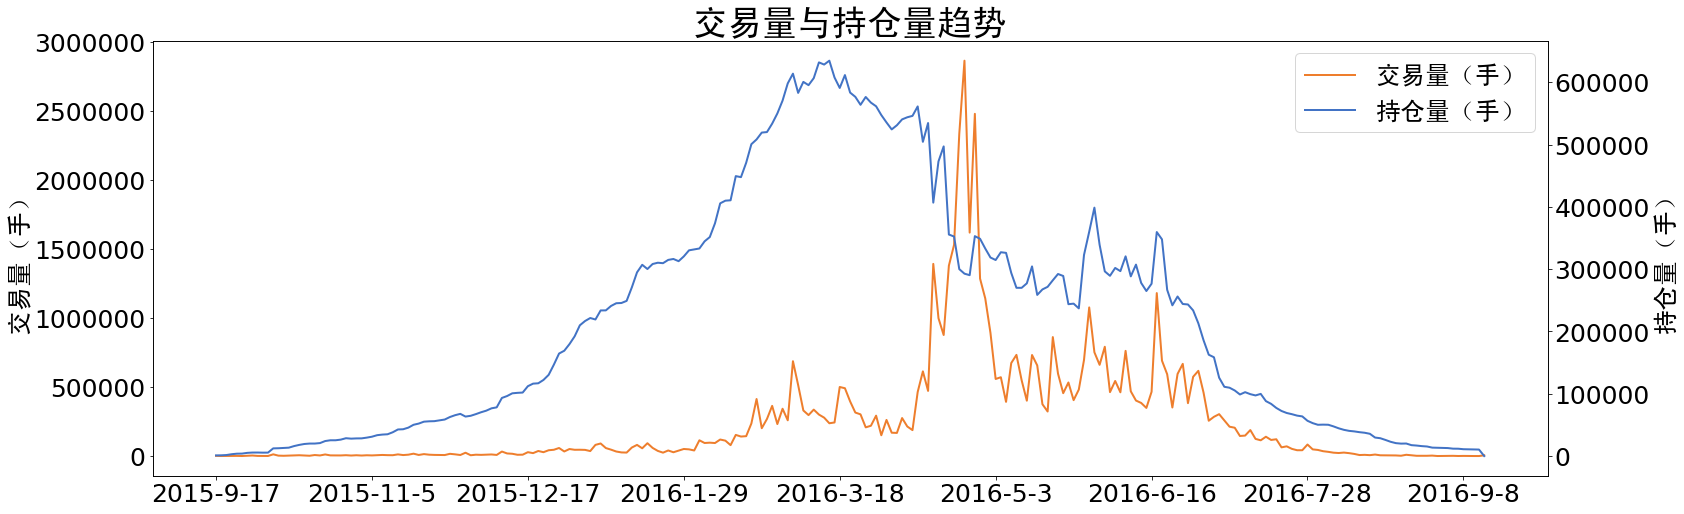

In [80]:
plot_vs(dt.trade_date, dt.vol, dt.hold, '交易量（手）', '持仓量（手）','交易量与持仓量趋势')


# 两列数据-单坐标轴

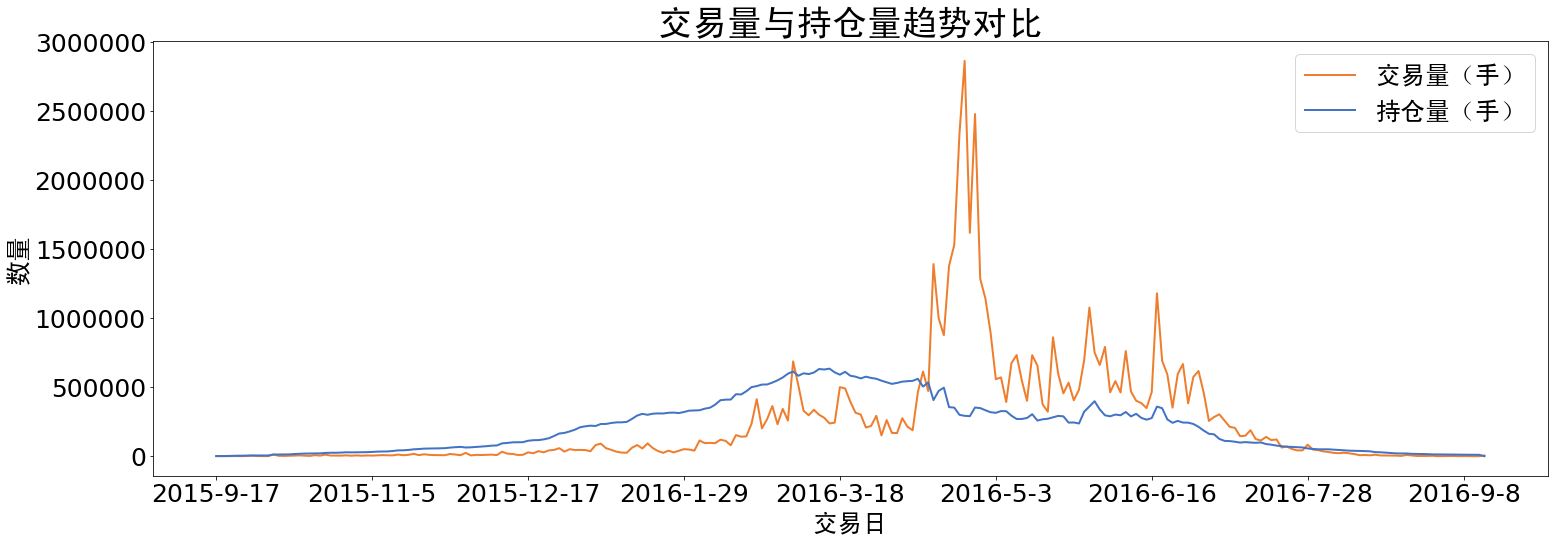

In [81]:
plot_two(dt.trade_date, dt.vol, dt.hold, '交易日','数量','交易量（手）', '持仓量（手）','交易量与持仓量趋势对比')


# 坐标系

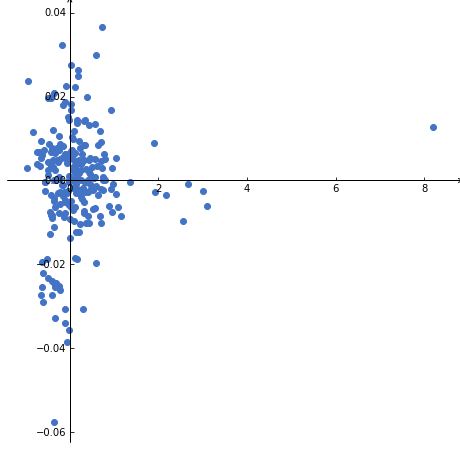

In [82]:
plot_descartes((dt.vol.shift(1)-dt.vol)/dt.vol, (dt.clear_price.shift(1)-dt.clear_price)/dt.clear_price)


# 子图

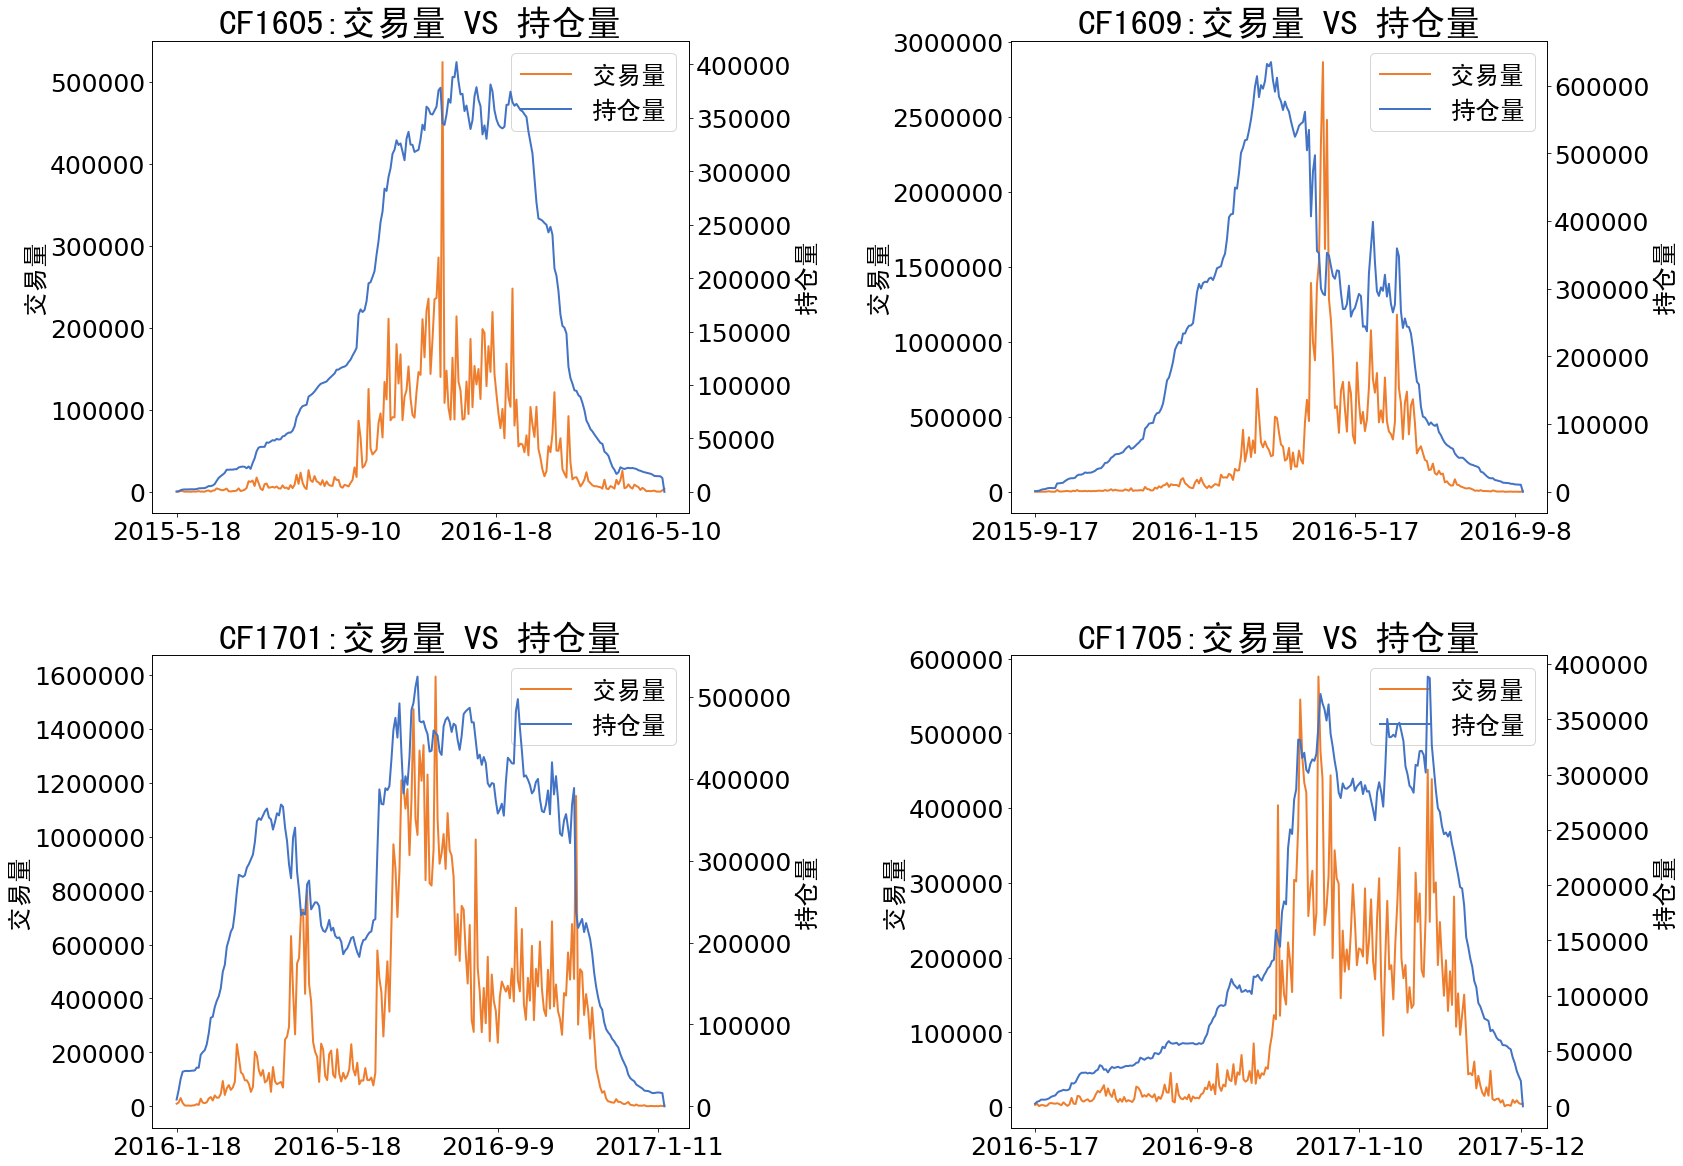

In [83]:
class PC1(PlotConfig):
    def __init__(self):
        super().__init__()
        
PC1.tick_len = 80
PC1.fig_y = 20

plot_subplots(data=data, 
              id_list=['CF1605','CF1609','CF1701','CF1705'],
              x_column='trade_date', 
              y1_column='vol', 
              y2_column='hold', 
              y1_label='交易量', 
              y2_label='持仓量', 
              title='交易量 VS 持仓量', 
              x_num=2, 
              y_num=2,
              ptConfig=PC1
              )